TASK 1: TITANIC SURVIVAL PREDICTION

IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sci
import statsmodels.formula.api as smf

EXTRACTING DATA FROM FILE

In [3]:
titanic_data=pd.read_csv("tested.csv", header=0, sep=",")
print(titanic_data.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


CLEANING OF DATA

In [4]:
titanic_data.dropna(axis=0, inplace=True)
print(titanic_data.head())

    PassengerId  Survived  Pclass  \
12          904         1       1   
14          906         1       1   
24          916         1       1   
26          918         1       1   
28          920         0       1   

                                                 Name     Sex   Age  SibSp  \
12      Snyder, Mrs. John Pillsbury (Nelle Stevenson)  female  23.0      1   
14  Chaffee, Mrs. Herbert Fuller (Carrie Constance...  female  47.0      1   
24    Ryerson, Mrs. Arthur Larned (Emily Maria Borie)  female  48.0      1   
26                       Ostby, Miss. Helene Ragnhild  female  22.0      0   
28                            Brady, Mr. John Bertram    male  41.0      0   

    Parch       Ticket      Fare            Cabin Embarked  
12      0        21228   82.2667              B45        S  
14      0  W.E.P. 5734   61.1750              E31        S  
24      3     PC 17608  262.3750  B57 B59 B63 B66        C  
26      1       113509   61.9792              B36        C  
28 

INFORMATION ABOUT DATA

In [5]:
print(titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 87 entries, 12 to 414
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  87 non-null     int64  
 1   Survived     87 non-null     int64  
 2   Pclass       87 non-null     int64  
 3   Name         87 non-null     object 
 4   Sex          87 non-null     object 
 5   Age          87 non-null     float64
 6   SibSp        87 non-null     int64  
 7   Parch        87 non-null     int64  
 8   Ticket       87 non-null     object 
 9   Fare         87 non-null     float64
 10  Cabin        87 non-null     object 
 11  Embarked     87 non-null     object 
dtypes: float64(2), int64(5), object(5)
memory usage: 8.8+ KB
None


In [6]:
titanic_data["Age"]=titanic_data["Age"].astype(int)
titanic_data["Fare"]=titanic_data["Fare"].astype(int)
print(titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 87 entries, 12 to 414
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  87 non-null     int64 
 1   Survived     87 non-null     int64 
 2   Pclass       87 non-null     int64 
 3   Name         87 non-null     object
 4   Sex          87 non-null     object
 5   Age          87 non-null     int32 
 6   SibSp        87 non-null     int64 
 7   Parch        87 non-null     int64 
 8   Ticket       87 non-null     object
 9   Fare         87 non-null     int32 
 10  Cabin        87 non-null     object
 11  Embarked     87 non-null     object
dtypes: int32(2), int64(5), object(5)
memory usage: 8.2+ KB
None


In [7]:
print(titanic_data.describe())

       PassengerId   Survived     Pclass        Age      SibSp      Parch  \
count    87.000000  87.000000  87.000000  87.000000  87.000000  87.000000   
mean   1102.712644   0.505747   1.137931  39.229885   0.597701   0.482759   
std     126.751901   0.502865   0.435954  15.233608   0.637214   0.860801   
min     904.000000   0.000000   1.000000   1.000000   0.000000   0.000000   
25%     986.000000   0.000000   1.000000  27.000000   0.000000   0.000000   
50%    1094.000000   1.000000   1.000000  39.000000   1.000000   0.000000   
75%    1216.000000   1.000000   1.000000  50.000000   1.000000   1.000000   
max    1306.000000   1.000000   3.000000  76.000000   3.000000   4.000000   

             Fare  
count   87.000000  
mean    97.666667  
std     88.165894  
min      0.000000  
25%     35.000000  
50%     71.000000  
75%    134.500000  
max    512.000000  


NUMBER OF PASSENGERS WHO SURVIVED

0 FOR--> DIED

1 FOR--> SURVIVED

In [8]:
titanic_tr=pd.read_csv("tested.csv")
titanic_test=pd.read_csv("tested.csv")

In [11]:
titanic_tr.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
titanic_tr.shape

(418, 12)

In [10]:
titanic_tr['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

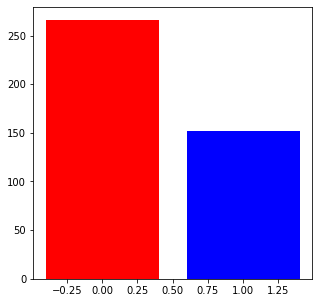

In [11]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_tr["Survived"].value_counts().keys()),list(titanic_tr["Survived"].value_counts()),color=["r","b"])
plt.show()

In [12]:
titanic_tr["Pclass"].value_counts()

Pclass
3    218
1    107
2     93
Name: count, dtype: int64

In [13]:
titanic_tr["Sex"].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

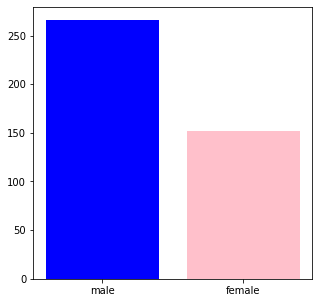

In [14]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_tr["Sex"].value_counts().keys()),list(titanic_tr["Sex"].value_counts()),color=["b","pink"])
plt.show()

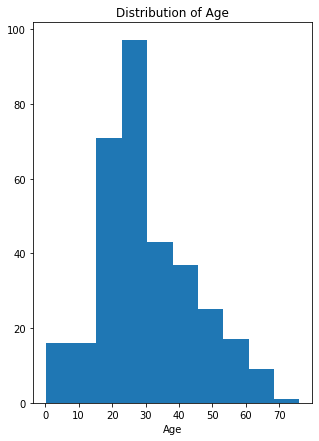

In [15]:
plt.figure(figsize=(5,7))
plt.hist(titanic_tr["Age"])
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.show()

In [16]:
x_train=titanic_tr[['Age']]
y_train=titanic_tr[['Survived']]

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
dtc= DecisionTreeClassifier()

In [19]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [20]:
sum(titanic_test['Age'].isnull())

86

In [21]:
titanic_test=titanic_test.dropna()

In [22]:
sum(titanic_test['Age'].isnull())

0

In [23]:
x_test=titanic_test[['Age']]

In [24]:
y_predict=dtc.predict(x_test)